# Solving the Black&ndash;Scholes model using the finite-difference method

## Black&ndash;Scholes model

The environment is a security market model with two basic securities. Time
is continuous and given by a finite interval $\mathcal{T}=\left[ 0,T\right] $. One security provides a constant risk-free return $r$ over each
infinitesimal horizon. We call this security the (infinitesimal) risk-free
bond. An initial investment $B_{0}=1$ into this security accumulates over
time as

\begin{equation}
dB_{t}=rB_{t}dt
\end{equation}

so that the value of such an investment at time $t$ is

\begin{equation}
B_{t}=\exp \left( \int_{0}^{t}rds\right) =\exp \left( rt\right)
\text{.}
\end{equation}

The second security is a risky stock with price $Q_{t}$ that follows a
geometric Brownian motion

\begin{equation}
dQ_{t}=\mu Q_{t}dt+\sigma Q_{t}dW_{t}
\end{equation}

with constant scalar parameters $\mu $ and $\sigma $ and a given initial
price $Q_{0}$. For simplicity, we assume that the stock pays no dividends on
$\left[ 0,T\right] $. An explicit solution to this equation is given by

\begin{equation}
Q_{t}=Q_{0}\exp \left( \left( \mu -\frac{1}{2}\sigma ^{2}\right) t+\sigma
W_{t}\right) .
\end{equation}

The expected price conditional on $Q_{0}$ then is

\begin{equation*}
E\left[ Q_{t}|Q_{0}\right] =Q_{0}\exp \left( \mu t\right) .
\end{equation*}

From these expressions, we can compute the annualized expected infinitesimal
returns on the two investments over a short horizon $t$. For the investment
into the risk-free security

\begin{equation*}
\lim_{t\rightarrow 0}\frac{1}{t}\frac{E\left[ B_{t}\right] -B_{0}}{B_{0}}%
=\lim_{t\rightarrow 0}\frac{1}{t}\left( \exp \left( rt\right) -1\right) =r,
\end{equation*}

and for the risky stock

\begin{equation*}
\lim_{t\rightarrow 0}\frac{1}{t}\frac{E\left[ Q_{t}\right] -Q_{0}}{Q_{0}}%
=\lim_{t\rightarrow 0}\frac{1}{t}\left( \exp \left( \mu t\right) -1\right)
=\mu .
\end{equation*}

The infinitesimal risk premium on the stock therefore is $\mu -r$.

The security market is hence characterized by three parameters, the
risk-free rate $r$, the expected return on the risky investment $\mu $ and
the volatility of the risky investment $\sigma $.

Uncertainty in this financial market is driven by a scalar Brownian motion.
At every time $t$, an investor can choose to purchase $\theta _{t}^{f}$
units of the risk-free asset at price $B_{t}$ and $\theta _{t}^{r}$ units of
the stock at price $Q_{t}$. The financial gain over an infinitesimal horizon
from this investment is

\begin{equation*}
\theta _{t}^{f}dB_{t}+\theta _{t}^{r}dQ_{t}
\end{equation*}

and a given portfolio strategy $\theta ^{f}$, $\theta ^{r}$ yields terminal
wealth at time $T$

\begin{equation*}
J_{T}=J_{0}+\int_{0}^{T}\left[ \left( \theta _{t}^{f}rB_{t}+\theta
_{t}^{r}\mu \right) dt+\theta _{t}^{r}\sigma dW_{t}\right] .
\end{equation*}

The value $J_{T}$ is the terminal payoff from the portfolio strategy.

We hence have a market with uncertainty driven by a univariate Brownian
motion and two investable assets, one risk-free and one risky with a
nontrivial volatility of the price. Without going into formal proofs, this
market is so-called \textbf{complete}. Consider an arbitrary time-$T$ payoff
$G_{T}$ that is $\mathcal{F}_{T}$-measurable, which means that it is a
function of the history of the Brownian motion $W$, and, for technical
reasons, also square integrable. Market completeness means that any such
payoff $G_{T}$ can be obtained as an outcome of a suitably chosen dynamic
portfolio strategy $\theta ^{f}$, $\theta ^{r}$, with a particular amount of
initial wealth.





### Derivative securities

We are interested in pricing a security with terminal payoff at time $T$
equal to $G\left( Q_{T}\right) $. Since the payoff is a function of the
underlying stock price, such a security is called <b>derivative</b>. Typical examples of
derivative securities are options. A call option with strike price $K$ has
payoff

\begin{equation}
G\left( Q_{T}\right) =\max \left( Q_{T}-K,0\right) \equiv \left(
Q_{T}-K\right) _{+},
\end{equation}

while a put option with strike price $K$ has payoff

\begin{equation}
G\left( Q_{T}\right) =\max \left( K-Q_{T},0\right) \equiv \left(
K-Q_{T}\right) _{+}.
\end{equation}

The term option comes from the fact that, for example in the case of a call
option, its payoff is equivalent to the right to buy the underlying stock at
time $T$ for the price $K$. The value of that option at maturity is
therefore equal to the difference $Q_{T}-K$ but if this difference is
negative, the owner is not mandated to buy the stock at price $K$ that would
be higher than the current market price $Q_{T}$. Correspondingly, a put
option gives the owner the right to sell the stock at time $T$ for the price
$K$. Options with this specification are called European options because
they give the right to exercise them on a given date $T$, while American
options give the right to exercise at any time on or before the given date $%
T $.

The time-$T$ payoff $G\left( Q_{T}\right) $ of the derivative security only
depends on $Q_{T}$. Further, the interest rate $r$ is constant, and the
distribution of the future stock price conditional on time-$t$ information
only depends on $Q_{t}$. We can therefore conjecture that the time-$t$ price
can be written as $g\left( Q_{t},t\right) $, where $g$ is a pricing function
we need to derive. The explicit dependence of the price on time $t$ is given
by the fact that we are pricing a security with a finite-horizon payoff at
time $T$, and hence we need to encode the time remaining to maturity of the
security.

Since the risk-free bond and the stock generate a complete market, every
other financial security is \textbf{redundant}, meaning that its payoff can
be achieved by a suitable dynamic portfolio strategy in the bond and stock.
It follows from absence of arbitrage, discussed in Section~\ref%
{sec:absence_of_arbitrage_equilibrium}, that the price $g\left(
Q_{t},t\right) $ must be equal to the value of the portfolio needed to
replicate the same terminal payoff $G\left( Q_{T}\right) $. If it were not,
then a strategy that would purchase the cheaper asset or portfolio while
selling the more expensive one would generate immediate positive payoff
without any future financial consequences.



### Replication argument

We now develop the replication
argument. In order to do that, we need to determine the portfolio positions
that generate the replicating portfolio. One of the fundamental ideas of
Black and Scholes (actually pointed out to them by Robert Merton, see
Footnote 3 in Black and Scholes (1973)) that provides an answer to this
problem is the concept of <b>dynamic hedging</b>. The idea is to find a
particular combination of the bond and stock such that the infinitesimal
return is the same as the infinitesimal return on the derivative security.
Extending the infinitesimal argument to finite horizons yields the desired
answer.

We develop the idea in an equivalent way, from a slightly different angle.
Specifically, we want to construct a portfolio consisting of a particular
combination of the stock and the derivative that makes the return on this
portfolio risk-free, over an infinitesimal horizon. Since the portfolio is
risk-free, it must earn the risk-free rate $r$, otherwise an arbitrage
opportunity would emerge.

Let such a self-financing portfolio consist of one option with current price
$g\left( Q_{t},t\right) $ and a position of $\theta _{t}^{r}$ units of the
risky stock with price $Q_{t}$. The value of this portfolio is

\begin{equation*}
1\cdot g\left( Q_{t},t\right) +\theta _{t}^{r}Q_{t}%
\text{.}
\end{equation*}

By the self-financing assumption, the financial gain on the stock portion of
this portfolio is $\theta _{t}^{r}dQ_{t}$, and the financial gain on the
option portion is $1\cdot dg\left( Q_{t},t\right) $. An application of It%
\^{o}'s lemma implies that

\begin{align}
dg\left( Q_{t},t\right) &=g_{Q}\left( Q_{t},t\right) dQ_{t}+\frac{1}{2}%
g_{QQ}\left( Q_{t},t\right) \left( dQ_{t}\right) ^{2}+g_{t}\left(
Q_{t},t\right) dt \\
&=\left[ g_{Q}\left( Q_{t},t\right) \mu Q_{t}+\frac{1}{2}g_{QQ}\left(
Q_{t},t\right) \sigma ^{2}+g_{t}\left( Q_{t},t\right) \right] dt+g_{Q}\left(
Q_{t},t\right) \sigma Q_{t}dW_{t}.
\end{align}

The evolution of the value of the portfolio is therefore given by

\begin{align}
dg\left( Q_{t},t\right) +\theta _{t}^{r}dQ_{t} &=\left[ \left( g_{Q}\left(
Q_{t},t\right) +\theta _{t}^{r}\right) \mu Q_{t}+\frac{1}{2}g_{QQ}\left(
Q_{t},t\right) \sigma ^{2}Q_{t}^{2}+g_{t}\left( Q_{t},t\right) \right] dt \\
&+\left[ g_{Q}\left( Q_{t},t\right) +\theta _{t}^{r}\right] \sigma
Q_{t}dW_{t}.
\end{align}

We want to choose $\theta _{t}^{r}$ to make the gain on the portfolio
locally risk-free, corresponding to a zero risk exposure. This implies we
must choose

\begin{equation*}
\theta _{t}^{r}=-g_{Q}\left( Q_{t},t\right) .
\end{equation*}

With this choice, the financial gain on the portfolio is equal to

\begin{equation}
dg\left( Q_{t},t\right) -g_{Q}\left( Q_{t},t\right) dQ_{t}=\left[ \frac{1}{2}%
g_{QQ}\left( Q_{t},t\right) \sigma ^{2}Q_{t}^{2}+g_{t}\left( Q_{t},t\right) %
\right] dt. 
\end{equation}

At the same time, because this portfolio is risk-free, the absence of
arbitrage argument implies that this portfolio then must earn the risk-free
rate $r$, and hence

\begin{equation}
dg\left( Q_{t},t\right) -g_{Q}\left( Q_{t},t\right) dQ_{t}=r\left[ g\left(
Q_{t},t\right) -g_{Q}\left( Q_{t},t\right) Q_{t}\right] dt.
\end{equation}

Equalizing the drift terms on the right-hand sides of two above equations, and writing $Q$ instead of $Q_{t}$, we obtain the equation

\begin{equation}
rg\left( Q,t\right) =g_{t}\left( Q,t\right) +g_{Q}\left( Q,t\right) rQ+\frac{1}{2}g_{QQ}\left( Q,t\right) \sigma ^{2}Q^{2}.
\end{equation}

This is a second-order partial differential equation for the price of the
derivative security $g\left( Q,t\right) $. This second-order PDE\ has a
terminal boundary condition $g\left( Q,T\right) =G\left( Q\right) $ which
states that the price of the derivative security at maturity time $T$ is
equal to the payoff $G\left( Q\right) $.

An inspection of the PDE reveals that it does not depend
on the expected return on the stock $\mu $, and hence we only need to
determine parameters $r$ and $\sigma $. This is a critical observation shown
by Black and Scholes (1973) that simplified valuation of derivative
securities dramatically. While the risk-free rate $r$ is directly observable
and the volatility of risky asset returns can be reasonably inferred from
high-frequency data, measuring the expected return on a risky asset $\mu $
is an inherently difficult task.

It turns out that the replication argument combined with absence of
arbitrage imply that the valuation of the derivative security does not
depend on $\mu $. This argument does not depend on the extremely simple
structure of the Black and Scholes (1973) model and carries over to a
variety of extensions as well.

### Analytical solution

The prices of the European call and put options with payoffs can be determined as
closed-form expressions which only depend on quantiles of the normal
distribution. These well-known formulas are provided in the following
proposition.

<div style="background-color:#BBCC33;padding:10pt;margin-top:10pt;margin-bottom:0pt;">
    <b>Proposition</b>
</div>
<div style="background-color:#DDEE99;padding:10pt;margin-top:0pt;margin-bottom:10pt;">

Time-$t$ prices of call and put options with strike price $K$ and maturity $T$, are given by
    
\begin{align}
C\left( Q,t\right)  &=QN\left( z_{1}\right) -\exp \left( -r\left(
T-t\right) \right) KN\left( z_{2}\right)  \\
P\left( Q,t\right)  &=\exp \left( -r\left( T-t\right) \right) KN\left(
-z_{2}\right) -QN\left( -z_{1}\right)
\end{align}
    
where $N\left( \cdot \right) $ is the cumulative standard normal
distribution function, and
    
\begin{align}
z_{1} &=\frac{\log \left( \frac{Q}{K}\right) +\left( r+\frac{1}{2}\sigma
^{2}\right) \left( T-t\right) }{\sigma \sqrt{T-t}} \\
z_{2} &=z_{1}-\sigma \sqrt{T-t}.
\end{align}
</div>

It can be verified that $C\left( Q,t\right) $ and $P\left( Q,t\right) $
satisfy the Black&ndash;Scholes partial differential equation with the
alternative terminal boundary conditions given by the payoffs.

It turns out that given a strike price $K$, it is sufficient to compute only
the price of one of the options because the call and put option price are
related through the so-called <b>put-call parity</b>

\begin{equation}
P\left( Q_{t},t\right) +Q_{t}=C\left( Q_{t},t\right) +K\exp \left( -r\left(
T-t\right) \right) .
\end{equation}

The put-call parity result is based on a replication argument. The left-hand
side of the equation is the value of a portfolio consisting of a
put option and the stock, with payoff $\max \left( K-Q_{T},0\right)
+Q_{T}=\max \left( K,Q_{T}\right) $. The right-hand side is the value of a
portfolio invested in a call option and a risk-free investment with face
value $K$, with total payoff $\max \left( Q_{T}-K,0\right) +K=\max \left(
Q_{T},K\right) $.

Since the portfolios on both sides of the equation have identical payoffs at
time $T$, then, by the no-arbitrage argument, they must also have the same
time-$t$ valuation. $P\left( Q_{t},t\right) $ and $C\left( Q_{t},t\right) $
are the prices of the options, $Q_{t}$ is the stock price and $K\exp \left(
-r\left( T-t\right) \right) $ is the time-$t$ value of the risk-free
investment.

## Finite difference method

We study numerical solutions for a class of partial differential equations

\begin{equation}
-v_{t}\left( x,t\right) =\underset{
\begin{array}{c}
{\large \doteq Dv\left( x,t\right)}
\end{array}
}{\underbrace{-v\left( x,t\right) r\left( x,t\right) +v_{x}\left( x,t\right)
\mu \left( x,t\right) +\frac{1}{2}v_{xx}\left( x,t\right) \sigma \left(
x,t\right) ^{2}}}+h\left( x,t\right)
\end{equation}

where $\mathcal{D}v\left( x,t\right) $ collects all derivatives with respect
to the state variable $x$. We assume that $X_{t}\in \mathcal{X}=\left[ l,r%
\right] $ with an appropriately specified boundary condition at $\left\{
l,r\right\} $. There is a terminal boundary condition $v\left( x,T\right)
=H\left( x,T\right) $ with a known function $H$. We study two types of
boundary conditions in the state dimension:

\begin{equation}
\left( A\right) :\alpha \left( x,t\right) v_{x}\left( x,t\right) +\beta
\left( x,t\right) v\left( x,t\right) =\gamma \left( x,t\right) \qquad 
x\in \left\{ l,r\right\} ,t\in \lbrack 0,T)
\end{equation}

for some (predetermined) functions $\alpha $, $\beta $ and $\gamma $ that
incorporates a variety of possible behaviors of $X$ at the boundaries, and

\begin{equation}
\left( B\right) :v_{xx}\left( x,t\right) =0 \qquad x\in \left\{
l,r\right\} ,t\in \lbrack 0,T)
\end{equation}

which is an example that can be useful for the approximation of the state
space for problems like the Black&ndash;Scholes model. Each of the boundary
conditions has a slightly different numerical implementation.

The idea is to overlay a grid of nodes over the region $\mathcal{X}\times
\mathcal{T}=\left[ l,r\right] \times \left[ 0,T\right] $ and approximate the
PDE by replacing derivatives at the nodes with differences. This turns the
functional equation into an algebraic system of linear equations. This
system is very easy to solve in principle but there are important
considerations regarding the choice of the grid and construction of the
derivatives which affect the accuracy and stability of the solution method.

The PDE of the so-called parabolic type. The form of these equations,
together with the given terminal condition, invite a particular solution
technique '<i>in layers</i>' that resembles backward iteration on a value function.

### Mapping of the problem to the Black&ndash;Scholes model

The Black&ndash;Scholes problem for the valuation of the derivative security is
characterized by the partial differential equation

\begin{equation}
rg\left( Q,t\right) =g_{t}\left( Q,t\right) +g_{Q}\left( Q,t\right) rQ+\frac{%
1}{2}g_{QQ}\left( Q,t\right) \sigma ^{2}Q^{2}
\end{equation}

with terminal condition $g\left( Q,T\right) =G\left( T\right) $. Hence we
have $r\left( x,t\right) =r$, $\mu \left( x,t\right) =rx$, $\sigma \left(
x,t\right) =\sigma x$, $h\left( x,t\right) =0$, and $H\left( x,T\right)
=G\left( x\right) $.

A more delicate issue is the choice of the boundary conditions at $x\in
\left\{ l,r\right\} $. The state space for the valuation problem is the open
interval $Q\in \left( 0,\infty \right) $, and does not prescribe any
specific boundary conditions, since the boundaries $\left\{ 0,\infty
\right\} $ are not part of the state space, they are so-called open.

In the implementation of the Black&ndash;Scholes model, we will not go into the
details of exact characterization of these open boundaries, and instead take
a practical approach. Imagine that we are interested in the solution on the
interval $\left[ a,b\right] \subset \left( 0,\infty \right) $. We then
choose boundaries $\left\{ l,r\right\} $ with $0<l<a<b<r<\infty $ such that
the solution on $\left[ a,b\right] $ is not sensitive to the choice of the
boundaries.

In the case of option pricing, a plausible observation is that if the current state $Q$
is sufficiently distant from the strike price $K$ at which the nonlinearity
of the payoff occurs, then the price $g\left( Q,t\right) $ becomes close to
linear in $Q$. Then we could neglect the second-order derivative term in at those boundaries, and impose $%
g_{xx}\left( Q,t\right) =0$. Hence we obtain the boundary condition of type $%
\left( B\right) $:

\begin{equation}
g_{xx}\left( Q,t\right) =0\qquad Q\in \left\{ l,r\right\} \text{, }t\in
\lbrack 0,T)\text{.}
\end{equation}

We could have also mapped the boundary approximation to the boundary
condition of type $\left( A\right) $ by further assuming $g_{t}\left(
Q,t\right) =0$ for $Q\in \left\{ l,r\right\} $. This would yield type $%
\left( A\right) $ boundary with $\beta \left( x,t\right) =r$, $\alpha \left(
x,t\right) =-rx$, and $\gamma \left( x,t\right) =0$.

### Transformation of variables

Another choice to be considered is a transformation of the state variable $Q$
in the Black&ndash;Scholes problem. In the following, we consider the
construction of an equidistant grid, with equally spaced nodes. At the same
time, the state variable in the Black and Scholes (1973) model follows a
geometric Brownian motion, so perhaps a grid with node distances that scale
proportionally with $Q$ may be more desirable. Alternatively, we could
consider rewriting the model using $q=\log Q$ as the state variable.

To achieve that, define the transformation $f\left( q,t\right) =f\left( \log
Q,t\right) =g\left( Q,t\right) =g\left( \exp \left( q\right) ,t\right) $.
Then the derivatives are given as follows

\begin{align}
f_{q}\left( q,t\right)  &=\frac{d}{dq}g\left( \exp \left( q\right)
,t\right) =g_{Q}\left( \exp \left( q\right) ,t\right) \exp \left( q\right)
=g_{Q}\left( Q,t\right) Q \\
f_{qq}\left( q,t\right)  &=\frac{d}{dq}\left( g_{Q}\left( \exp \left(
q\right) ,t\right) \exp \left( q\right) \right) =g_{QQ}\left( Q,t\right)
Q^{2}+g_{Q}\left( Q,t\right) Q.
\end{align}

so that the partial differential equation is transformed to%

\begin{equation}
rf\left( q,t\right) =f_{t}\left( q,t\right) +\left( r-\frac{1}{2}\sigma
^{2}\right) f_{q}\left( q,t\right) +\frac{1}{2}\sigma ^{2}f_{qq}\left(
q,t\right)
\end{equation}

with the terminal boundary condition $f\left( q,t\right) =G\left( \exp
\left( q\right) \right) $. We then obtain the general specification of the\
PDE with $r\left( x,t\right) =r$, $\mu \left( x,t\right) =r-\frac{1}{2}%
\sigma ^{2}$, $\sigma \left( x,t\right) =\sigma $, $h\left( x,t\right) =0$.
The auxiliary approximate boundary condition of type $\left( A\right) $ can
then be written as

\begin{equation}
rf\left( q,t\right) =\left( r-\frac{1}{2}\sigma ^{2}\right) f_{q}\left(
q,t\right) \qquad q\in \left\{ l,r\right\} ,
\end{equation}

which can be mapped to the general form as $\alpha \left( x,t\right) =r-%
\frac{1}{2}\sigma ^{2}$, $\beta \left( x,t\right) =-r$, $\gamma \left(
x,t\right) =0$. Alternatively, the boundary condition of type $\left(
B\right) $ imposes $f_{qq}\left( q,t\right) =0$, $q\in \left\{ l,r\right\} $.

### Relationship to a present-value problem

When $X_{t}$ lives on an open (and possibly infinite) interval $\left(
l,r\right) $, then a result known as the Feynman&ndash;Kac formula shows that the
solution of the PDE can be equivalently written in the form of a
present-value formula

\begin{equation}
v\left( x,t\right) =E\left[ \int_{t}^{T}\phi \left( t,s\right) h\left(
X_{s},s\right) ds+\phi \left( t,T\right) H\left( X_{T},T\right) \mid X_{t}=x%
\right]
\end{equation}

where

\begin{align}
\phi \left( t,s\right)  &=\exp \left( -\int_{t}^{s}r\left( X_{\tau },\tau
\right) d\tau \right)  \\
dX_{t} &=\mu \left( X_{t},t\right) dt+\sigma \left( X_{t},t\right) dW_{t}.
\end{align}

Mapping this formula to the Black--Scholes problem, we can express the value
of the derivative security as

\begin{equation}
g\left( Q_{t},t\right) =E\left[ e^{-r\left( T-t\right) }G\left( Q_{T}\right)
|Q_{t}\right] 
\end{equation}

with $Q_{t}$ following the dynamics

\begin{equation}
dQ_{t}=rQ_{t}dt+\sigma Q_{t}dW_{t}^{\ast }\text{.}
\end{equation}

Here, $W_{t}^{\ast }$ is a Brownian motion process but it is distinct from $%
W_{t}$ that drives the data-generating dynamics of the stock price.

This result can be interpreted as a present discounted value formula for the
time-$t$ price of the cash flow $G\left( Q_{T}\right) $, discounted by a
hypothetical stochastic discount factor

\begin{equation}
\frac{S_{T}^{\ast }}{S_{t}^{\ast }}=e^{-r\left( T-t\right) }
\end{equation}

under the assumption that the dynamics of the stock price is modified as
well, with expected return on the stock equal to $r$ instead of $\mu $. This
is an example of valuation representation known as risk-neutral pricing.
This central result in asset pricing theory states that we can view asset
prices as expected cash flows discounted by risk-free rates, as long as we
properly adjust the dynamics of those cash flows.

### Grid construction and approximation with differences

We discretize the space and time dimensions by choosing integers $I$, $J$
that define the space step $\Delta x\doteq \left( r-l\right) /I$ and the
time step $\Delta t\doteq T/J$. In the space dimension, we construct a grid $%
\mathbb{X}=\left\{ l,l+\Delta x,l+2\Delta x,\ldots ,r-\Delta x,r\right\} $.
Similarly, the grid in the time dimension is $\mathbb{T}=\left\{ 0,\Delta
t,2\Delta t,\ldots ,T-\Delta t,T\right\} $. Combining the two grids, we
obtain a two-dimensional $\left( I+1\right) \times \left( J+1\right) $ node
grid $\mathbb{X}\times \mathbb{T}$ on $\mathcal{X}\times \mathcal{T}$ where
node $\left( i,j\right) $ represents the state $\left( x,t\right) =\left(
i\Delta x,j\Delta t\right) $. We denote values of functions on the grid as $%
f_{i,j}\doteq f\left( i\Delta x,j\Delta t\right) $.

The choice of the length of the steps $\Delta x$ and $\Delta t$ is not
innocuous, it determines the accuracy of the approximation as well as
stability of the approximation scheme. Unsuitable choices can easily lead to
divergence of the numerical algorithm.

<img src="https://raw.githubusercontent.com/jborovicka/nyu-computational-dynamics/main/jupyter/graphs/finite_differences_equidistant_grid_slide.png" width="600px"/>

The above figure depicts the construction of the grid together with the
imposed terminal and boundary conditions. Nodes $v_{i,J}$, $i\in \left\{
0,\ldots ,I\right\} $ are given by the terminal condition $v_{i,J}=H_{i,J}$.
Nodes at the space boundaries $v_{0,j}$ and $v_{I,j}$, $j=\left\{ 0,\ldots
,J\right\} $ are given by the one of the boundary conditions. The goal is to
approximate the PDE at the nodes $\left( i,j\right) $.

We start with the discrete approximation of the space derivatives. We
approximate the derivative $v_{x}$ at node $\left( i,j\right) $ using values
of $v$ at adjacent nodes. We have several options:

\begin{align}
\text{forward difference}\text{: } &v_{x}\left( i\Delta x,j\Delta t\right)
\approx v_{i,j}^{\bar{x}}\doteq \frac{1}{\Delta x}\left(
v_{i+1,j}-v_{i,j}\right)  \\
\text{central difference}\text{: } &v_{x}\left( i\Delta x,j\Delta t\right)
\approx v_{i,j}^{x_{c}}\doteq \frac{1}{2\Delta x}\left(
v_{i+1,j}-v_{i-1,j}\right)  \\
\text{backward difference}\text{: } &v_{x}\left( i\Delta x,j\Delta t\right)
\approx v_{i,j}^{\underline{x}}\doteq \frac{1}{\Delta x}\left(
v_{i,j}-v_{i-1,j}\right) .
\end{align}

For example, the forward difference gets its name from the fact that we are
using the value of $v$ in the 'ahead' node $\left( i+1,j\right) $. The
choice of the particular difference may be important, since it affects the
stability of the chosen numerical scheme.

To approximate $v_{xx}$ we use the difference of differences. For example,
we can use the backward difference of forward differences $v^{\bar{x}}$:

\begin{equation}
v_{xx}\left( i\Delta x,j\Delta t\right) \approx v_{i,j}^{\bar{x}\underline{x}%
}=\frac{1}{\Delta x}\left( v_{i,j}^{\bar{x}}-v_{i-1,j}^{\bar{x}}\right) =%
\frac{1}{\left( \Delta x\right) ^{2}}\left(
v_{i+1,j}-2v_{i,j}+v_{i-1,j}\right) .
\end{equation}

Collecting terms, we replace the differential operator

\begin{equation}
\mathcal{D}v\left( x,t\right) =-v\left( x,t\right) r\left( x,t\right)
+v_{x}\left( x,t\right) \mu \left( x,t\right) +\frac{1}{2}v_{xx}\left(
x,t\right) \sigma \left( x,t\right) ^{2}
\end{equation}

at interior nodes $\left( x,t\right) =\left( i\Delta x,j\Delta t\right) $
with the difference operator

\begin{equation}
\left( Dv\right) _{i,j}=-v_{i,j}r_{i,j}+v_{i,j}^{\bar{x}}\mu _{i,j}+\frac{1}{%
2}v_{i,j}^{\bar{x}\underline{x}}\sigma _{i,j}^{2}
\end{equation}

(here, we used forward difference $v_{i,j}^{\bar{x}}$ as an example). The
difference operator is a linear function in unknowns $v_{i,j-1}$, $v_{i,j}$
and $v_{i,j+1}$, and can be written as

\begin{equation}
\left( Dv\right) _{i,j}=\left(
\begin{array}{ccccc}
\cdots  & \frac{1}{\left( \Delta x\right) ^{2}}\frac{1}{2}\sigma _{i,j}^{2},
& -r_{i,j}-\frac{1}{\Delta x}\mu _{i,j}-\frac{1}{\left( \Delta x\right) ^{2}}%
\sigma _{i,j}^{2}, & \frac{1}{\Delta x}\mu _{i,j}+\frac{1}{\left( \Delta
x\right) ^{2}}\frac{1}{2}\sigma _{i,j}^{2} & \cdots
\end{array}%
\right) \left(
\begin{array}{c}
\vdots  \\
v_{i-1,j} \\
v_{i,j} \\
v_{i+1,j} \\
\cdots
\end{array}%
\right)
\end{equation}

For a fixed time-node $j$, each space node $i$ will constitute one linear
equation.

We proceed in the same way at the boundaries. For boundaries of type $\left(
A\right) $, we use a forward difference at the lower boundary $x=l$ and a
backward difference at the upper boundary:

\begin{align}
\alpha _{0,j}v_{0,j}+\beta _{0,j}v_{0,j}^{\bar{x}} &=\gamma _{0,j} \\
\alpha _{I,j}v_{I,j}+\beta _{I,j}v_{I,j}^{\underline{x}} &=\gamma _{I,j}
\end{align}

From these equations, we can express the values $v_{0,j}$ and $v_{I,j}$ as
functions of the values at the adjacent nodes

\begin{align}
v_{0,j} &=\frac{\gamma _{0,j}-\left( \beta _{0,j}/\Delta x\right) v_{1,j}}{%
\alpha _{0,j}-\beta _{0,j}/\Delta x}
\\
v_{I,j} &=\frac{\gamma _{I,j}+\left( \beta _{I,j}/\Delta x\right) v_{I-1,j}%
}{\alpha _{I,j}+\beta _{I,j}/\Delta x}
\end{align}

For boundaries of type $\left( B\right) $, the approximation is the same as
in the case of interior nodes, noticing that in this case, the second-order
derivative is zero, which zeros out the contribution of the $\frac{1}{\left(
\Delta x\right) ^{2}}\sigma _{i,j}^{2}$ terms. At the lower boundary $x=l$,
we can use again the forward difference $v_{0,j}^{\bar{x}}$. At the upper
boundary, the use of the forward difference would lead to a term that depends
on $v_{I+1,j}$, which is a node outside of the grid, and so we use the
backward difference $v_{I,j}^{\underline{x}}$ instead.

In the time dimension, we proceed in the same way, and approximate $v_{t}$
using differences as follows:

\begin{align}
\text{forward difference}\text{: } &v_{t}\left( i\Delta x,j\Delta t\right)
\approx v_{i,j}^{\bar{t}}\doteq \frac{1}{\Delta t}\left(
v_{i,j+1}-v_{i,j}\right) \\
\text{backward difference}\text{: } &v_{t}\left( i\Delta x,j\Delta t\right)
\approx v_{i,j}^{\underline{t}}\doteq \frac{1}{\Delta t}\left(
v_{i,j}-v_{i,j-1}\right)
\end{align}

The choice will determine two difference solution methods. Using the forward
difference leads to the so-called implicit solution scheme, while the
backward difference leads to the explicit scheme. We study each of them in
turn.

### Explicit solution scheme

The explicit scheme replaces the differential equation with the difference scheme that relies on the backward derivative in the time dimension

\begin{equation}
-v_{i,j}^{\underline{t}}=\left( Dv\right) _{i,j}+h_{i,j}
\end{equation}

for nodes $\left( i,j\right) $, $i\in \left\{ 1,\ldots ,I-1\right\} $, $j\in
\left\{ 1,\ldots ,J\right\} $. We can rewrite this equation as

\begin{equation}
v_{i,j-1}=\left( \Delta t\right) \left( Dv\right) _{i,j}+v_{i,j}+\left(
\Delta t\right) h_{i,j}.
\end{equation}

The right-hand side depends only on values in nodes at time $j$. Hence if we
know the solution $v_{\cdot ,j}$ at time $j$ at all nodes $i$, we can use
the schem to compute the solution at time $j-1$. The complete solution is
obtained by iterating backward on this equation, starting with the known
terminal condition $v_{\cdot ,J}=H_{\cdot ,J}$.

<img src="https://raw.githubusercontent.com/jborovicka/nyu-computational-dynamics/main/jupyter/graphs/finite_differences_explicit_scheme_slide.png" width="600px"/>

The left panel of the above figure depicts the iteration implied by the
explicit scheme. Equation at node $\left( i,j\right) $ collects information
from $v_{i-1,j}$, $v_{i,j}$ and $v_{i,j+1}$ to explicitly compute the
solution for $v_{i,t-1}$.

The scheme can be efficiently written in matrix form. For the boundary
condition of type $\left( A\right) $, for a given $j$, we can write the
system of $I-1$ equations at interior nodes $i\in \left\{ 1,\ldots
,I-1\right\} $ as

\begin{equation}
v_{\cdot ,j-1}^{int}=A_{j}^{int}v_{\cdot ,j}^{int}+\widetilde{h}_{j}^{int}
\end{equation}

where $v_{\cdot ,j}^{int}=\left( v_{1,j},\ldots ,v_{I-1,j}\right) ^{\prime }$%
, values $v_{0,j}$ and $v_{I,j}$ were substituted out using their solved
values from the boundary conditions above, and $A_{j}^{int}$ is a
tri-diagonal $\left( I-1\right) \times \left( I-1\right) $ matrix, and $%
\widetilde{h}_{j}^{int}$ is an $\left( I-1\right) \times 1$ vector with
entries $\left( \Delta t\right) h_{i,j}$.

Similarly, for the boundary condition of type $\left( B\right) $, for a
given $j$, we can treat the boundary points in the same way as interior
ones, noticing that at the lower boundary, we have to use the forward
difference $v_{0,j}^{\bar{x}}$, while at the upper boundary, we have to use $%
v_{I,j}^{\underline{x}}$. We can then write the system of $I+1$ equations at
all nodes $i\in \left\{ 0,\ldots ,I\right\} $, including the boundary nodes,
as

\begin{equation}
v_{\cdot ,j-1}=A_{j}v_{\cdot ,j}+\widetilde{h}_{j}
\end{equation}

The vector $\widetilde{h}_{j}$ is an $\left( I+1\right) \times 1$ vector
with entries $\left( \Delta t\right) h_{i,j}$. The matrix $A_{j}$ takes the
form

\begin{equation}
I+\Delta t\left(
\begin{array}{ccccccc}
-r_{0,j}-\frac{1}{\Delta x}\mu _{0,j} & \frac{1}{\Delta x}\mu _{0,j} & 0 &
&  &  &  \\
& \cdots  & \cdots  & \cdots  &  &  &  \\
& 0 & \frac{1}{\left( \Delta x\right) ^{2}}\frac{1}{2}\sigma _{i,j}^{2} &
-r_{i,j}-\frac{1}{\Delta x}\mu _{i,j}-\frac{1}{\left( \Delta x\right) ^{2}}%
\sigma _{i,j}^{2} & \frac{1}{\Delta x}\mu _{i,j}+\frac{1}{\left( \Delta
x\right) ^{2}}\frac{1}{2}\sigma _{i,j}^{2} & 0 &  \\
&  &  & \cdots  & \cdots  & \cdots  &  \\
&  &  &  & 0 & -\frac{1}{\Delta x}\mu _{I,j} & -r_{I,j}+\frac{1}{\Delta x}%
\mu _{I,j}%
\end{array}%
\right)
\end{equation}

where $I$ is an $\left( I+1\right) \times \left( I+1\right) $ identity
matrix.

The choice of the grid, in particular the distances $\Delta x$ and $\Delta t$, can have profound implications for the stability of the numerical scheme,
and unsuitable choices, even though seemingly innocuous, may lead to
instability and divergence of the numerical approximation. We will not delve
into the details, which can be found in the lecture notes.\ As a guiding
rule of thumb, we should choose $\Delta x$ and $\Delta t$ such that
\begin{equation}
\sigma _{i,j}^{2}\Delta t<\left( \Delta x\right) ^{2}.
\end{equation}

Further, whenever $\mu _{i,j}>0$, it is generally preferable to use forward
differences in the state space dimension to replace $v_{x}$, especially when
the contribution of volatility $\sigma _{i,j}$ is small (a so-called
upwind principle). On the other hand, when $\mu _{i,j}<0$, the backward
difference is preferable. In both cases, we want $\Delta x>\left\vert \mu
_{i,j}\right\vert \frac{\Delta t}{2}$.\ More details can be found in the
lecture notes.

### Implicit solution scheme

Using the forward difference to approximate the time derivative $v_{t}\left(
x,t\right) $ leads to the difference scheme

\begin{equation}
-v_{i,j-1}^{\underline{t}}=\left( Dv\right) _{i,j-1}+h_{i,j-1}
\end{equation}

at nodes $\left( i,j-1\right) $, $i\in \left\{ 1,\ldots ,I-1\right\} $, $%
j\in \left\{ 1,\ldots ,J\right\} $, which we can write as

\begin{equation}
v_{i,j-1}-\left( \Delta t\right) \left( Dv\right) _{i,j-1}=v_{i,j}+\left(
\Delta t\right) h_{i,j-1}.
\end{equation}

This equation defines values for nodes at time $j-1$ implicitly, as an
equation for three unknowns $v_{i-1,j-1}$, $v_{i,j-1}$ and $v_{i+1,j}$
collected on the left-hand side, with a known value $v_{i,j}$. The figure below depicts the scheme.

<img src="https://raw.githubusercontent.com/jborovicka/nyu-computational-dynamics/main/jupyter/graphs/finite_differences_implicit_scheme_slide.png" width="600px"/>

For the case of boundary conditions of type $\left( A\right) $, we can write
the problem in matrix form as a system of $I-1$ equations

\begin{equation}
\widetilde{A}_{j}^{int}v_{\cdot ,j-1}^{int}=v_{\cdot ,j}^{int}+\widetilde{h}%
_{j}^{int}
\end{equation}

where we again substituted out $v_{0,j-1}$ and $v_{I,j-1}$ using the
boundary conditions. This yields the iterative scheme

\begin{equation}
v_{\cdot ,j-1}^{int}=\left( \widetilde{A}_{j}^{int}\right) ^{-1}\left(
v_{\cdot ,j}^{int}+\widetilde{h}_{j}^{int}\right) .
\end{equation}

When $\widetilde{A}_{j}^{int}=\widetilde{A}^{int}$, then this scheme only
requires one matrix inversion, but even when it is not, inverting the
tri-diagonal matrix $A_{j}$ is computationally relatively cheap.

In the case of boundary conditions of type $\left( B\right) $, we can treat
all nodes including the boundary nodes in the same way, and obtain

\begin{equation}
v_{\cdot ,j-1}=\left( \widetilde{A}_{j}\right) ^{-1}\left( v_{\cdot ,j}+%
\widetilde{h}_{j}\right) .
\end{equation}

The matrix $\widetilde{A}_{j}$ is almost identical to matrix $A_{j}$
constructed above for the explicit scheme, with only a change in the sign on
$\Delta t$.

For the stability of the implicit scheme, the $\sigma _{i,j}^{2}\Delta
t<\left( \Delta x\right) ^{2}$ guiding principle discussed above for the
case of the explicit scheme is generally not necessary.\ Again, more
discussion is provided in the lecture notes.

## Implementation

We now provide a numerical implementation of the finite difference method. We focus on the explicit method, the implicit method is very similar.

Define the local folder where graphs will be stored, and from which data will be retrieved. If you are running the notebook within Google Colab, use the second option.

In [1]:
graphfolder = "graphs/"
datafolder = "data/"

# options for Google Colab (uncomment the following lines)
# graphfolder = "gdrive/MyDrive/graphs/"
# datafolder = "gdrive/MyDrive/data/"

Import relevant packages.

In [2]:
# render graphs within notebook
%matplotlib inline

# import packages
import numpy as np

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


Write the function that takes as input model parameters and information on the structure of the grid, and provides the solution as output.

In [3]:
def solve_PDE_explicit_scheme(model):
    
    # extract model parameters
    r,sigma,T,K = model["r"],model["sigma"],model["T"],model["K"]
    N_Q,N_T,Q_boundaries = model["N_Q"],model["N_T"],model["Q_boundaries"]
    
    # discretization - construct step size in the Q and T dimension
    dQ = (Q_boundaries[1]-Q_boundaries[0])/(N_Q-1)
    dt = T/(N_T-1)
    
    # construct a grid for the stock price Q as a column vector
    Q = np.linspace(Q_boundaries[0],Q_boundaries[1],N_Q)
    v_old = Q *0
    # choose terminal payoff
    if model["option_type"] == "call":
        v_new = np.maximum(Q-K,0)
    
    # check conditional stability for the volatility term
    if (np.max(Q)**2 * sigma**2 * dt >= dQ**2):
        print('Explicit scheme will possibly be conditionally unstable due to the volatility term.')
    # check conditional stability due to the drift term (upwind method)
    # since mu = r*Q > 0, we prefer the forward difference, with dQ > mu/2*dt
    if (dQ <= r*np.max(Q)/2*dt):
        print('Explicit scheme will possibly be unstable due to the failure up the upwind scheme.')
    
    # construct Dv (becomes part of matrix A)
    A = np.zeros([N_Q,N_Q])
    for i in range(1,N_Q-1):
        # forward difference scheme
        A[i,i-1] =  1/2*sigma**2 * Q[i]**2 / dQ**2
        A[i,i] = -r - r*Q[i]/dQ - sigma**2 * Q[i]**2 / dQ**2 
        A[i,i+1] = r*Q[i]/dQ + 1/2*sigma**2 * Q[i]**2 / dQ**2
    # left boundary condition (row zero of matrix A)
    A[0,0] = -r - r*Q[0]/dQ
    A[0,1] = r*Q[0]/dQ
    # right boundary condition (row N_Q-1 of matrix A)
    A[N_Q-1,N_Q-2] = - r*Q[i]/dQ 
    A[N_Q-1,N_Q-1] = -r + r*Q[i]/dQ
    
    # matrix A for the explicit iteration scheme
    A = dt*A + np.eye(N_Q)
    
    # flow vector htilde
    h = dt*Q*0;
    
    # iterate over time backwards using the explicit scheme
    for i in range(N_T,0,-1):
        v_old = v_new
        v_new = A @ v_old + h    
    
    # store solution in a dictionary
    sol = {}
    sol["g"] = v_new
    sol["Q"] = Q
    return sol

Call the main function for several parameterizations.

In [4]:
# benchmark model parameters
model = {}
model["r"] = 0.02;
model["sigma"] = 0.1
model["T"] = 1;
model["option_type"] = "call"
model["K"] = 100

model["Q_boundaries"] = (50,150)
model["N_Q"] = 101
model["N_T"] = 1001

sol = solve_PDE_explicit_scheme(model)

# alternative model parameters
model_higher_sigma = model.copy()
model_higher_sigma["sigma"] = 0.2
sol_higher_sigma = solve_PDE_explicit_scheme(model_higher_sigma)

model_lower_r = model.copy()
model_lower_r["r"] = 0.0
sol_lower_r = solve_PDE_explicit_scheme(model_lower_r)


Plot the price of the derivative.

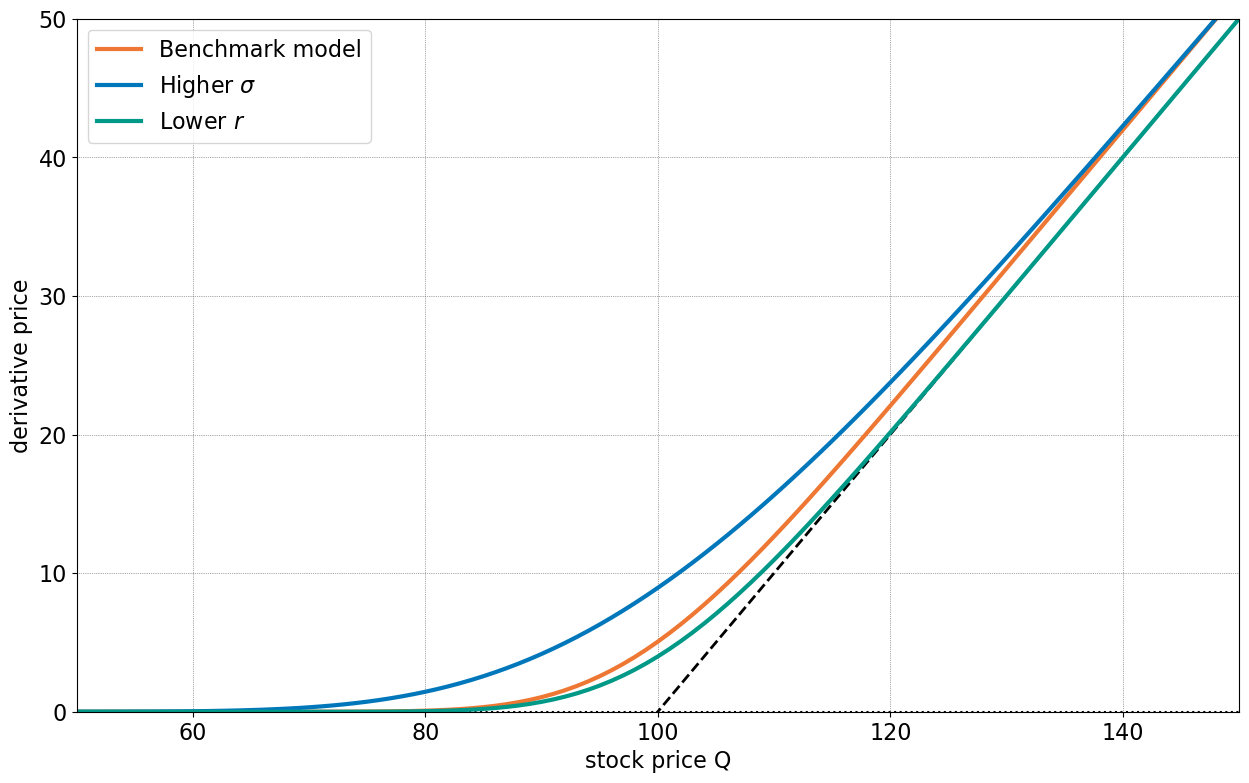

In [5]:
fig_param = {'figsize' : [15,9], 'fontsize': 16, 'subplots': [1,1],
         'title': '',
         'xlim': model["Q_boundaries"], 'ylim': [0,50],
         'xlabel': 'stock price Q', 'ylabel': 'derivative price',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions' : False, 'showNBERrecessions_y': [-50,50]}
    
fig,ax = ec.GenerateTSPlot(fig_param)

ax.plot(sol["Q"],sol["Q"]-model["K"],linewidth=2,linestyle="dashed",color=ec.tolColor['tolHighContrastBlack'],label='')

m1 = ax.plot(sol["Q"],sol["g"],linewidth=3,color=ec.tolColor['tolVibrantOrange'],label='Benchmark model')
m2 = ax.plot(sol_higher_sigma["Q"],sol_higher_sigma["g"],linewidth=3,color=ec.tolColor['tolVibrantBlue'],label='Higher $\sigma$')
m3 = ax.plot(sol_lower_r["Q"],sol_lower_r["g"],linewidth=3,color=ec.tolColor['tolVibrantTeal'],label='Lower $r$')

x = ax.legend(handles=m1+m2+m3,loc="upper left")